In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse
from rtbm import minimizer

from rtbm.activations import tanh, linear, sigmoid
from rtbm.mathtools import theta_1d, logtheta_1d_phaseI
from rtbm.riemann_theta.riemann_theta import RiemannTheta
from rtbm.gradientschemes import RMSprop, adam, adadelta, adagrad

from rtbm.initializers import uniform

import rtbm.layers as layers
import rtbm.model as mdl

from numpy import frompyfunc

# Derivatives test

In [75]:
Q=np.zeros((1,1), dtype=complex)
V=np.zeros((1,1), dtype=complex)
V[0,0]=0.1*2j*np.pi
Q[0,0]=0.01*2*np.pi

#print(theta_1d(V,Q,0))


print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[[1],[1]]))

#print(RiemannTheta(V/(2j*np.pi),1j*Q/(2*np.pi), derivs=[[1],[1]]))

#mpmath.jtheta(3,V[0,0],Q[0,0])

(1434.496055237161+0.0000000000000569872548807616j)


In [76]:
X=np.random.uniform(-50, 50,(1000,1))

In [77]:
%%time
t = RiemannTheta(X/(2j*np.pi),1j*Q/(2*np.pi))

CPU times: user 13.3 ms, sys: 48 µs, total: 13.4 ms
Wall time: 12.9 ms


In [80]:
Q=np.zeros((1,1), dtype=float)
V=np.zeros((1,1), dtype=float)
V[0,0]=0.1
Q[0,0]=0.01


print(theta_1d(V,Q,0))
print(np.exp(logtheta_1d_phaseI(V,Q,0)))

print(RiemannTheta(V/(2j*np.pi),-1*Q/(2j*np.pi)))

(41.32731350971547+0j)
[41.32731351+0.j]
(41.32731350971547+0j)


# Linear layer test

Progress: |█████████████████---| 89.7% | iteration 269 in 0.40(s) | cost = 0.000004

Progress: |████████████████████| 100.0% | iteration 300 in 0.45(s) | cost = 0.000001


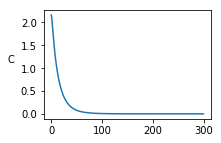

{'cost': array([2.14965469e+00, 2.08161210e+00, 1.95184632e+00, 1.80970964e+00,
        1.67507127e+00, 1.55060785e+00, 1.43599653e+00, 1.33049741e+00,
        1.23336182e+00, 1.14389222e+00, 1.06144787e+00, 9.85442209e-01,
        9.15338915e-01, 8.50647983e-01, 7.90921895e-01, 7.35752015e-01,
        6.84765219e-01, 6.37620764e-01, 5.94007397e-01, 5.53640714e-01,
        5.16260729e-01, 4.81629677e-01, 4.49530002e-01, 4.19762537e-01,
        3.92144856e-01, 3.66509772e-01, 3.42703985e-01, 3.20586851e-01,
        3.00029271e-01, 2.80912680e-01, 2.63128134e-01, 2.46575477e-01,
        2.31162589e-01, 2.16804703e-01, 2.03423776e-01, 1.90947930e-01,
        1.79310930e-01, 1.68451719e-01, 1.58313986e-01, 1.48845775e-01,
        1.39999132e-01, 1.31729774e-01, 1.23996796e-01, 1.16762395e-01,
        1.09991623e-01, 1.03652155e-01, 9.77140870e-02, 9.21497381e-02,
        8.69334782e-02, 8.20415659e-02, 7.74520017e-02, 7.31443916e-02,
        6.90998233e-02, 6.53007516e-02, 6.17308933e-02, 

In [81]:
def funcA(x):
    return 0.6-0.3*x

def funcB(x):
    return -0.5+0.8*x


def func(x1,x2):
    return 0.6-0.3*x1+1.2*x2

X1 = np.linspace(-5.3, 5, 997)
X2 = np.linspace(-5.5, 5, 997)

X = np.stack((X1,X2))

#Y = func(X1,X2).reshape((1,X.shape[1]))
Y = np.stack((funcA(X1),funcB(X2)))

M = mdl.Model()
M.add(layers.Linear(2,2))

#minim = minimizer.CMA(True)
#minim.train(mse(), M, X, Y, tolfun=1e-3)

M = mdl.Model()
M.add(layers.Linear(2,1))
M.add(layers.Linear(1,2))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, maxiter=300,batch_size=98)

# E(h|v) SGD test

## Phase I

In [103]:
def func(x):
    return np.sin(x)+x

X = np.linspace(-3.5, 5, 998)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3, phase=1j, Q_init=uniform(2,3+1e-5)))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1j, Q_init=uniform(2,3+1e-5)))

#M.add(layers.DiagExpectationUnitLayer(3,1, phase=1))


In [100]:

#print(M.get_parameters())
M.gradient_check(13,X,0.01)

('I: ', array([[-3.50000000e+00, -3.49147442e+00, -3.48294885e+00, -3.47442327e+00,
        -3.46589769e+00, -3.45737212e+00, -3.44884654e+00, -3.44032096e+00,
        -3.43179539e+00, -3.42326981e+00, -3.41474423e+00, -3.40621866e+00,
        -3.39769308e+00, -3.38916750e+00, -3.38064193e+00, -3.37211635e+00,
        -3.36359077e+00, -3.35506520e+00, -3.34653962e+00, -3.33801404e+00,
        -3.32948847e+00, -3.32096289e+00, -3.31243731e+00, -3.30391174e+00,
        -3.29538616e+00, -3.28686058e+00, -3.27833501e+00, -3.26980943e+00,
        -3.26128385e+00, -3.25275827e+00, -3.24423270e+00, -3.23570712e+00,
        -3.22718154e+00, -3.21865597e+00, -3.21013039e+00, -3.20160481e+00,
        -3.19307924e+00, -3.18455366e+00, -3.17602808e+00, -3.16750251e+00,
        -3.15897693e+00, -3.15045135e+00, -3.14192578e+00, -3.13340020e+00,
        -3.12487462e+00, -3.11634905e+00, -3.10782347e+00, -3.09929789e+00,
        -3.09077232e+00, -3.08224674e+00, -3.07372116e+00, -3.06519559e+00,
    

Progress: |████████████████████| 100.0% | iteration 1000 in 35.38(s) | cost = 0.021079


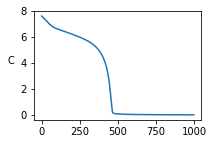

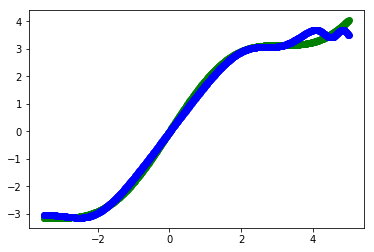

In [104]:
minim = minimizer.SGD()

minim.train(mse(), M, X, Y, lr=0.01,maxiter=1000)

plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

## Phase II

*** init ***
[[2.40080836+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 4.95351346+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 2.74998067+0.j]]
[[4.38409502+0.j]]
Progress: |████████████████████| 100.0% | iteration 500 in 10.69(s) | cost = 0.019111


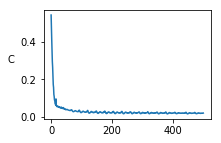

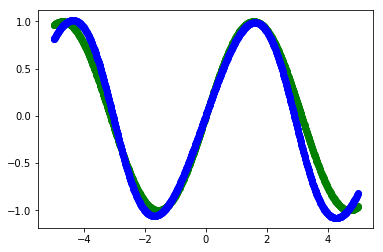

In [2]:
def func(x):
    return np.sin(x)

X = np.linspace(-5, 5, 997)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3, phase=1j, Q_init=uniform(2,3+1e-5)))
M.add(layers.DiagExpectationUnitLayer(3,1, phase=1j, Q_init=uniform(2,3+1e-5)))

print("*** init ***")
print(M.get_layer(1)._q)
print(M.get_layer(2)._q)

minim = minimizer.SGD()

minim.train(mse(), M, X, Y, lr=0.1, scheme=RMSprop(), maxiter=500)

plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

In [ ]:
print(M.get_layer(1)._q)
print(M.get_layer(2)._q)


## CMA

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3,phase=1))
M.add(layers.DiagExpectationUnitLayer(3,1,phase=1))

minim = minimizer.CMA()

minim.train(mse(), M, X, Y, maxiter=500)
plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

In [ ]:
def func(x1,x2):
    return 0.2*x1+0.4*x2+0.8

X1 = np.linspace(-5.3, 5, 1000)
X2 = np.linspace(-5.5, 5, 1000)

X = np.stack((X1,X2))

Y = func(X1[:,None],X2[:,None]).reshape((1,X1.shape[0]))

M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(2,1))
M.add(layers.DiagExpectationUnitLayer(1,1))


minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1,maxiter=400)

#plt.plot(X.flatten(), Y.flatten(),"og-", label='fit')
#plt.plot(X.flatten(), np.real(M.predict(X)).flatten(),"ob-", label='fit')

# Layer test

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
def func(x):
    return np.sin(x)

X = np.linspace(0, 10, 5)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
minim = minimizer.CMA(True)
minim.train(mse(), M, X, Y, tolfun=1e-3)

In [ ]:
npoints = 5
test_X = (np.linspace(0, 10, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Misc tests

In [ ]:
L = layers.MaxPosLayer(3,1)

In [ ]:
L.feedin(np.array([Y,2*Y,1*Y]).reshape(3,5))

In [ ]:
np.array([Y,2*Y,Y]).reshape(3,5)

In [ ]:
np.empty(0)

In [ ]:
derivative_1d_theta_phaseI([0.1],[1j],0)